## **Project 5**

#### **Pre-processing of the Data**

We need first to transform the data as we did in the ProjectEx1 :

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

diseases_df = pd.read_csv("CVD_cleaned.csv")

#Transfomation of the column "Sex" to a binary column "Is_Male with value 1 if the patient is a male and 0 if not".

diseases_df.rename(columns={'Sex': 'Is_Male'}, inplace=True)
diseases_df['Is_Male'] = diseases_df['Is_Male'].map({'Male': 1, 'Female': 0})

#Converts the ages intervals into a numeric value that represents the interval (average of the interval)

def convert_age(age_category):
  if age_category != "80+":

    ages = [int(age) for age in age_category.split('-')]
    average_age = sum(ages) / len(ages)
  else:

    average_age = 85
  return int(average_age)

diseases_df.rename(columns={'Age_Category': 'Age'}, inplace=True)
diseases_df['Age'] = diseases_df['Age'].apply(convert_age)

# Transforms those category to binary categories with 1 when "Yes" and 0 when "No". For "Diabetes" we convert this to 4 categories.
binary_features = ['Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer',
                   'Depression', 'Diabetes', 'Arthritis', 'Smoking_History']

for feature in binary_features:
  diseases_df[feature] = diseases_df[feature].map({'Yes': 1, 'Yes, but female told only during pregnancy': 2,
                                                   'No, pre-diabetes or borderline diabetes': 3, 'No': 0})

# Maps for each level of a general health, we grade from 0 to 4.
diseases_df['General_Health'] = diseases_df['General_Health'].map({'Excellent': 4, 'Very Good': 3,
                                                            'Good': 2, 'Fair': 1, 'Poor': 0})

#Transform the type of the feature "Chcekup" from object to string

diseases_df = diseases_df.astype({'Checkup': 'string'})

diseases_df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Is_Male,Age,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,Within the past 2 years,0,0,0,0,0,0,1,0,72,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,3,Within the past year,0,1,0,0,0,1,0,0,72,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,3,Within the past year,1,0,0,0,0,1,0,0,62,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,0,Within the past year,1,1,0,0,0,1,0,1,77,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,2,Within the past year,0,0,0,0,0,0,0,1,85,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,3,Within the past year,1,0,0,0,0,0,0,1,27,168.0,81.65,29.05,0,4.0,30.0,8.0,0.0
308850,1,Within the past 5 years,1,0,0,0,0,1,0,1,67,180.0,69.85,21.48,0,8.0,15.0,60.0,4.0
308851,3,5 or more years ago,1,0,0,0,1,2,0,0,32,157.0,61.23,24.69,1,4.0,40.0,8.0,4.0
308852,3,Within the past year,1,0,0,0,0,0,0,1,67,183.0,79.38,23.73,0,3.0,30.0,12.0,0.0


#### **Part A: Bayesian approach**

Our question is : Does the value of the height differs between people that smoke or have ever smoked and people who never smoke ?

1) Now we will sample two samples: one of size 1000 that represent the past data, and one of size 200 that represent the current data.

In [40]:
np.random.seed(11)
size_sample_current = 200

diseases_current = diseases_df.sample(size_sample_current)
diseases_current

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Is_Male,Age,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
284805,4,Within the past 2 years,1,0,0,0,0,0,0,0,47,170.0,80.74,27.88,0,14.0,30.0,60.0,2.0
270255,4,Within the past year,1,0,0,0,0,0,0,1,62,191.0,86.18,23.75,0,20.0,60.0,8.0,1.0
74097,4,Within the past year,1,0,1,0,1,0,0,0,37,170.0,62.14,21.46,1,7.0,60.0,30.0,1.0
105913,2,Within the past year,1,0,0,0,0,0,0,0,52,173.0,90.72,30.41,0,0.0,8.0,0.0,0.0
113777,2,Within the past year,1,0,0,0,0,0,0,1,72,173.0,72.57,24.33,1,10.0,60.0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95474,4,Within the past year,0,0,0,0,0,0,0,1,77,155.0,77.11,32.12,1,0.0,4.0,4.0,3.0
305525,1,Within the past year,0,0,0,0,0,0,0,0,85,160.0,53.98,21.08,0,0.0,0.0,4.0,0.0
85713,2,Within the past year,0,0,0,0,0,0,0,0,37,157.0,61.23,24.69,1,0.0,2.0,16.0,4.0
188337,0,Within the past 5 years,0,0,0,1,0,1,0,0,85,163.0,47.63,18.02,0,0.0,16.0,30.0,4.0


In [41]:
intersection_empty = False
size_sample_past = 1000

while not intersection_empty:
  diseases_past = diseases_df.sample(size_sample_past)
  intersection_empty = diseases_current.index.intersection(diseases_past.index).empty

diseases_past

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Is_Male,Age,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
165119,1,Within the past year,1,0,0,0,0,0,0,1,27,183.0,86.18,25.77,1,0.0,10.0,4.0,8.0
232536,3,Within the past year,1,0,0,0,1,0,0,1,21,183.0,65.77,19.67,0,0.0,12.0,2.0,5.0
128455,3,Within the past year,0,0,0,0,1,0,0,1,42,180.0,68.04,20.92,1,4.0,16.0,30.0,4.0
221257,2,Within the past year,1,0,0,0,0,0,0,0,62,165.0,68.04,24.96,0,2.0,30.0,30.0,4.0
47110,3,Within the past year,1,0,0,0,0,0,0,0,57,157.0,88.00,35.48,0,0.0,60.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181567,3,Within the past year,0,0,0,0,1,0,0,1,52,188.0,110.22,31.20,1,1.0,4.0,12.0,0.0
238171,3,Within the past year,1,0,0,0,0,0,1,1,77,170.0,58.97,20.36,1,2.0,20.0,0.0,30.0
29038,4,Within the past year,1,0,0,0,0,0,0,1,47,191.0,124.74,34.37,1,0.0,28.0,30.0,0.0
29288,4,Within the past 5 years,1,0,0,0,0,0,0,1,21,198.0,95.25,24.27,0,0.0,60.0,16.0,8.0


2) Now we will calculate the parameter Z and we will define tau as the quantile 0,7:

In [42]:
tau = diseases_df["Height_(cm)"].quantile(0.7)
print(f"tau = {tau}")

diseases_past['Z'] = diseases_past['Height_(cm)'].apply(lambda valeur: 1 if valeur > tau else 0)
diseases_current['Z'] = diseases_current['Height_(cm)'].apply(lambda valeur: 1 if valeur > tau else 0)

psis = {}

tau = 178.0


a) Now we will estimate psi and calculate the confidence interval based on bootstrap. To estimate p1 and p2 we will use the MLE: proportion.

In [43]:
def logit_func(p):
  return np.log(p / (1-p))

In [44]:
z1 = [None, None]
z2 = [None, None]

z1[0] = diseases_current[(diseases_current["Smoking_History"] == 0) & (diseases_current["Z"] == 0)].shape[0]
z1[1] = diseases_current[(diseases_current["Smoking_History"] == 0) & (diseases_current["Z"] == 1)].shape[0]

z2[0] = diseases_current[(diseases_current["Smoking_History"] == 1) & (diseases_current["Z"] == 0)].shape[0]
z2[1] = diseases_current[(diseases_current["Smoking_History"] == 1) & (diseases_current["Z"] == 1)].shape[0]

p1 = z1[1] / sum(z1)
p2 = z2[1] / sum(z2)

psi_estimator = logit_func(p1) - logit_func(p2)
print(f"The estimator of psi is: {psi_estimator}")

The estimator of psi is: 0.7621400520468968


Now we will check normality of the data per category in order to use the normal approximation to calculate the confidence interval based on bootstrap.

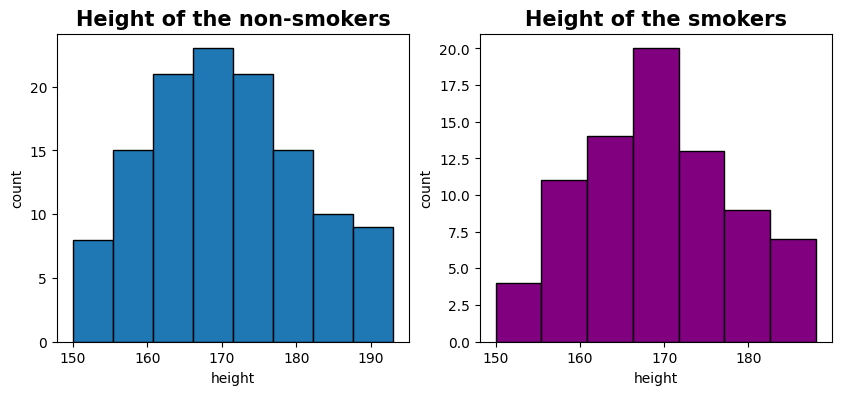

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))

only_smokers_df = diseases_current[diseases_current['Smoking_History'] == 1]
only_no_smokers_df = diseases_current[diseases_current['Smoking_History'] == 0]

only_no_smokers_df['Height_(cm)'].hist(edgecolor = "black", grid = False, bins = 8, ax= axes[0])
axes[0].set_title("Height of the non-smokers", size = 15, fontweight = "bold")
axes[0].set_xlabel("height")
axes[0].set_ylabel("count")

only_smokers_df['Height_(cm)'].hist(edgecolor = "black", grid = False, bins = 7, ax =axes[1], color="purple")
axes[1].set_title("Height of the smokers", size = 15, fontweight = "bold")
axes[1].set_xlabel("height")
axes[1].set_ylabel("count")

plt.show()

We can see from the histograms that the assumption of normal distribution is reasonable, so we can use the normal approximation in order to calculate the confidence interval based on bootstrap.

In [46]:
B = 1000
psi_bootstraps = []
alpha = 0.05
quantile_alpha = stats.norm.ppf(1 - alpha/2)

for b in range(B):
  z1_bootstrap = [None, None]
  z2_bootstrap = [None, None]

  new_current_sample = diseases_current.sample(size_sample_current, replace=True)
  z1_bootstrap[0] = new_current_sample[(new_current_sample["Smoking_History"] == 0) & (new_current_sample["Z"] == 0)].shape[0]
  z1_bootstrap[1] = new_current_sample[(new_current_sample["Smoking_History"] == 0) & (new_current_sample["Z"] == 1)].shape[0]

  z2_bootstrap[0] = new_current_sample[(new_current_sample["Smoking_History"] == 1) & (new_current_sample["Z"] == 0)].shape[0]
  z2_bootstrap[1] = new_current_sample[(new_current_sample["Smoking_History"] == 1) & (new_current_sample["Z"] == 1)].shape[0]

  psi_boot = logit_func(z1_bootstrap[1] / sum(z1_bootstrap)) - logit_func(z2_bootstrap[1] / sum(z2_bootstrap))
  psi_bootstraps.append(psi_boot)

psi_boot_mean = np.mean(psi_bootstraps)
psi_se = np.std(psi_bootstraps)

CI_psi = [psi_boot_mean - quantile_alpha * psi_se, psi_boot_mean + quantile_alpha * psi_se]
psis['question a'] = [psi_estimator, CI_psi[0], CI_psi[1]]
print(f"The confidence interval based on bootstrap is: {CI_psi}")

The confidence interval based on bootstrap is: [-0.1483415828094985, 1.7327473449669004]


b) Now we will us a uniform standars prior for p1 and p2 and we will estimate psi and calculate the credible interval of psi. We will us the equality that we saw in class and use: S+1/n+2 where S is the quantity of smokers, or non-smokers that the height is higher than tau, and n is the total quantity of smokers or non smokers.

We know that for prior : pi(p) = 1 we have a posterior distribution of p which is Beta(S+1, n-S+1) where n and S are defined previously

In [47]:
z1_uniform_prior = [None, None]
z2_uniform_prior = [None, None]

z1_uniform_prior[0] = diseases_current[(diseases_current["Smoking_History"] == 0) & (diseases_current["Z"] == 0)].shape[0]
z1_uniform_prior[1] = diseases_current[(diseases_current["Smoking_History"] == 0) & (diseases_current["Z"] == 1)].shape[0]

z2_uniform_prior[0] = diseases_current[(diseases_current["Smoking_History"] == 1) & (diseases_current["Z"] == 0)].shape[0]
z2_uniform_prior[1] = diseases_current[(diseases_current["Smoking_History"] == 1) & (diseases_current["Z"] == 1)].shape[0]

p1_uniform_prior = (z1_uniform_prior[1] + 1) / (sum(z1_uniform_prior) + 2)
p2_uniform_prior = (z2_uniform_prior[1] + 1) / (sum(z2_uniform_prior) + 2)

psi_estimator_uniform_prior = logit_func(p1_uniform_prior) - logit_func(p2_uniform_prior)
print(f"The estimator of psi by the uniform prior is: {psi_estimator_uniform_prior}")

The estimator of psi by the uniform prior is: 0.6892112744387069


We now calculate the credible interval of psi based on quantiles method:

In [48]:
psi_estimators_uniform_prior = []

for b in range(B):
  p1_estimator = stats.beta.rvs(z1_uniform_prior[1] + 1, sum(z1_uniform_prior) - z1_uniform_prior[1] + 1, size=1)
  p2_estimator = stats.beta.rvs(z2_uniform_prior[1] + 1, sum(z2_uniform_prior) - z2_uniform_prior[1] + 1, size=1)

  psi_estimators_uniform_prior.append(logit_func(p1_estimator) - logit_func(p2_estimator))

credible_interval_uniform = [np.quantile(psi_estimators_uniform_prior, 0.025), np.quantile(psi_estimators_uniform_prior, 0.975)]
psis['question b'] = [psi_estimator_uniform_prior, credible_interval_uniform[0], credible_interval_uniform[1]]
print(f"The credible interval is: {credible_interval_uniform}")

The credible interval is: [-0.0363401619946819, 1.6119825191454165]


c) The Jeffreys' prior is : pi(p) = sqrt(I(p)). We will use the same estimator than the estimator with the uniform prior. Let us see what is the posterior distribution:

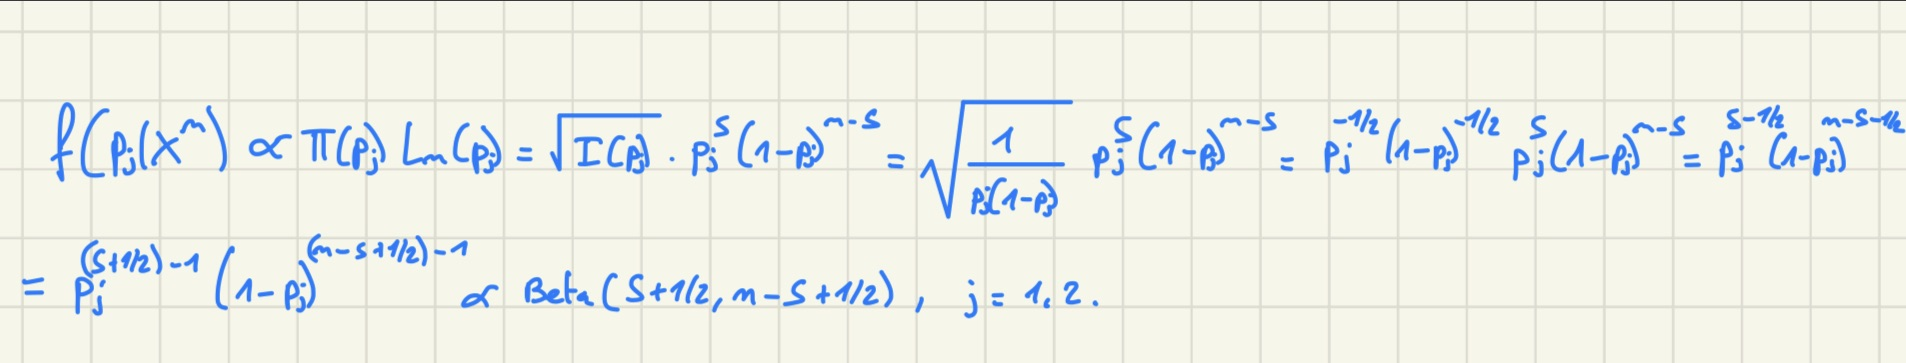

In [49]:
psi_estimators_jeffreys_prior = []

for b in range(B):
  p1_estimator = stats.beta.rvs(z1_uniform_prior[1] + 1/2, sum(z1_uniform_prior) - z1_uniform_prior[1] + 1/2, size=1)
  p2_estimator = stats.beta.rvs(z2_uniform_prior[1] + 1/2, sum(z2_uniform_prior) - z2_uniform_prior[1] + 1/2, size=1)

  psi_estimators_jeffreys_prior.append(logit_func(p1_estimator) - logit_func(p2_estimator))

psi_jeffreys = np.mean(psi_estimators_jeffreys_prior)
credible_interval_jeffreys = [np.quantile(psi_estimators_jeffreys_prior, 0.025), np.quantile(psi_estimators_jeffreys_prior, 0.975)]
psis['question c'] = [psi_jeffreys, credible_interval_jeffreys[0], credible_interval_jeffreys[1]]

print(f"The estimator of psi by Jeffreys' prior is: {psi_jeffreys}")
print(f"The credible interval is: {credible_interval_jeffreys}")

The estimator of psi by Jeffreys' prior is: 0.7439455785896701
The credible interval is: [-0.07275530937364512, 1.6015437409845923]


d) Now we will use the past data to estimate the values of the parameters of the beta distribution of p

In [50]:
z1_past = [None, None]
z2_past = [None, None]

z1_past[0] = diseases_past[(diseases_past["Smoking_History"] == 0) & (diseases_past["Z"] == 0)].shape[0]
z1_past[1] = diseases_past[(diseases_past["Smoking_History"] == 0) & (diseases_past["Z"] == 1)].shape[0]

z2_past[0] = diseases_past[(diseases_past["Smoking_History"] == 1) & (diseases_past["Z"] == 0)].shape[0]
z2_past[1] = diseases_past[(diseases_past["Smoking_History"] == 1) & (diseases_past["Z"] == 1)].shape[0]

alpha_1 = z1_past[1] + 1
beta_1 = z1_past[0] + 1

alpha_2 = z2_past[1] + 1
beta_2 = z2_past[0] + 1

print(f"The prior distribution of p1 is: Beta({alpha_1}, {beta_1})")
print(f"The prior distribution of p2 is: Beta({alpha_2}, {beta_2})")

The prior distribution of p1 is: Beta(122, 457)
The prior distribution of p2 is: Beta(116, 309)


Let see what is the posterior distribution of p given the prior distribution:

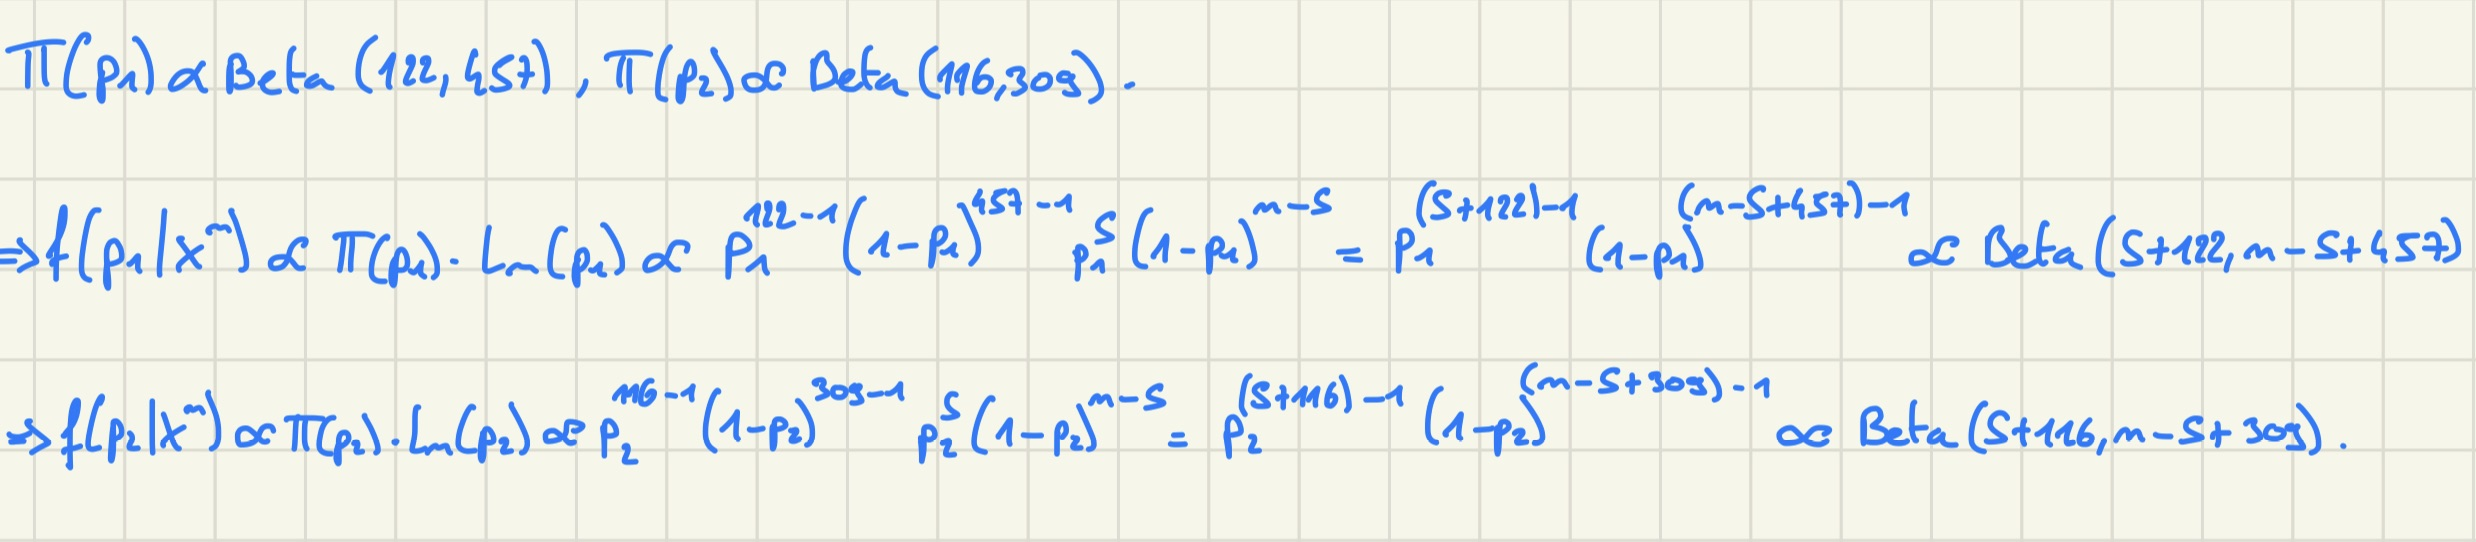

Now, we will estimate psi and calculate its credible interval:

In [51]:
psi_estimators_past = []

for b in range(B):
  p1_estimator = stats.beta.rvs(z1[1] + 122, z1[0] + 457, size=1)
  p2_estimator = stats.beta.rvs(z2[1] + 116, z2[0] + 309, size=1)

  psi_estimators_past.append(logit_func(p1_estimator) - logit_func(p2_estimator))

psi_past = np.mean(psi_estimators_past)
credible_interval_past = [np.quantile(psi_estimators_past, 0.025), np.quantile(psi_estimators_past, 0.975)]
psis['question d'] = [psi_past, credible_interval_past[0], credible_interval_past[1]]

print(f"The estimator of psi by past data's prior is: {psi_past}")
print(f"The credible interval is: {credible_interval_past}")

The estimator of psi by past data's prior is: -0.21670017869420033
The credible interval is: [-0.49658505790771773, 0.04091293830782062]


e) Now, we will compare the different estimators:

In [52]:
psis_df = pd.DataFrame.from_dict({key: [value[0], value[2] - value[1]] for key, value in psis.items()},
                                 orient='index', columns=['Estimator', 'CI length'])
psis_df

,Estimator,CI length
question a,0.762140,1.881089
question b,0.689211,1.648323
question c,0.743946,1.674299
question d,-0.216700,0.537498


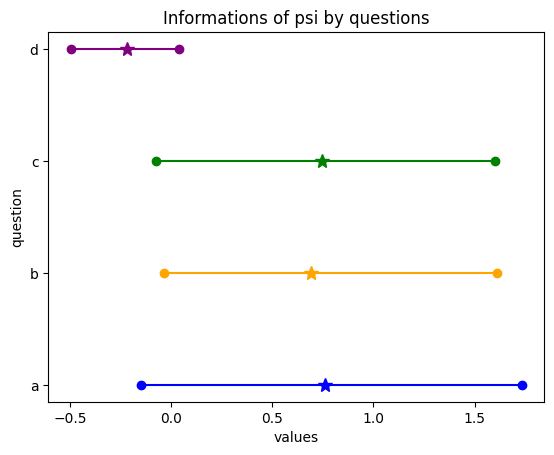

In [53]:
for key, y, color in zip(psis.keys(), [k for k in range(len(psis))], ["blue", "orange", "green", "purple"]):
  plt.plot(psis[key][0], y, color=color, marker='*', markersize=10)
  plt.plot((psis[key][1], psis[key][2]), (y,y), color = color, marker = "o")

plt.yticks([k for k in range(len(psis))], ["a", "b", "c", "d"])
plt.xlabel("values")
plt.ylabel("question")
plt.title("Informations of psi by questions")
plt.show()

We can see that the credible interval of the question d is significantly smaller than all the others credible intervals. It is logical because we have more past data and so our knowledge of the world is more significant. So, all our estimations are more precise and that is why we have a length is significantly smaller than the others. For the others credible intervals, we can see that the lengths are quite equal.

#### **Part B: Missing Data**

We will choose explainers parameters: X1 = "Height_(cm)", X2 = "BMI", X3 = "Is_Male"

We will choose explained parameters: Y = "Weight_(kg)"

1) Now we will sample a sample of size 1000

In [54]:
np.random.seed(3)
sample_size = 1000
p = 4

diseases_sample = diseases_df.sample(sample_size, replace = False)
diseases_sample

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Is_Male,Age,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
301916,4,Within the past 5 years,1,0,0,0,0,0,0,1,32,180.0,79.38,24.41,0,0.0,30.0,4.0,4.0
229928,4,Within the past year,1,0,0,0,0,0,0,0,52,173.0,63.50,21.29,0,25.0,30.0,16.0,4.0
15526,2,Within the past year,1,1,0,0,0,0,0,1,85,180.0,80.74,24.83,0,0.0,30.0,12.0,4.0
43456,2,Within the past year,1,0,0,0,0,0,0,0,42,163.0,69.40,26.26,1,0.0,6.0,7.0,30.0
77654,0,Within the past year,1,0,0,0,0,0,1,1,57,178.0,102.06,32.28,0,6.0,5.0,3.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172329,4,Within the past year,1,0,0,0,0,1,1,1,62,180.0,92.99,28.59,0,0.0,60.0,24.0,2.0
192333,3,Within the past 5 years,1,0,0,0,0,0,0,1,42,178.0,88.90,28.12,1,12.0,16.0,12.0,2.0
256439,3,Within the past year,1,0,0,1,0,1,0,1,62,183.0,81.65,24.41,1,30.0,12.0,4.0,2.0
17198,4,Within the past 5 years,1,0,0,0,0,0,0,0,57,170.0,74.84,25.84,0,10.0,30.0,30.0,6.0


2) Now, we will estimate the coefficients of the linear regression and we will calculate confidence intervals:

In [55]:
def calc_regression_model(df, dict_regression, num_explainers_params, print_model):
  X = df[[dict_regression[f"x{i + 1}"] for i in range(num_explainers_params)]].to_numpy()
  X = np.c_[np.ones(X.shape[0]), X]
  y = df[dict_regression["y"]].to_numpy()

  XT_X_inv = np.linalg.inv(np.matmul(X.T, X))
  XT_y = np.matmul(X.T, y)

  beta_estimator = np.matmul(XT_X_inv, XT_y)

  if print_model:

    print("The model is:")
    print("y = ", end="")

    for i, key in zip(range(beta_estimator.shape[0]), dict_regression.keys()):
      print(f"({beta_estimator[i]})", end="")

      if key != "y":
        print(f" * {key}", end="")

      if i != beta_estimator.shape[0] - 1:
        print(" + ", end="")

    print()
    print()
    print("Where:")

    for key in dict_regression:
      print(f"{key} is the column {dict_regression[key]}")

  return beta_estimator, X, y

In [56]:
betas_dict = {}
CIs_dict = {}

dict_regression = {"y": "Weight_(kg)","x1": "Height_(cm)", "x2": "BMI", "x3": "Is_Male"}
beta_estimator_sample, X_sample, y_sample = calc_regression_model(diseases_sample, dict_regression, 3, True)

betas_dict["Full data"] = beta_estimator_sample

The model is:
y = (-172.14364489439322) + (1.0249355163371945) * x1 + (2.830816943565985) * x2 + (-0.3327590069275175) * x3

Where:
y is the column Weight_(kg)
x1 is the column Height_(cm)
x2 is the column BMI
x3 is the column Is_Male


In [57]:
def calc_beta_confidence_interval(beta_estimator, X, y, y_pred, alpha, CI_dict, key):
  quantile_alpha = stats.norm.ppf(1 - alpha/2)

  C = np.linalg.inv(np.matmul(X.T, X))
  e = y - y_pred
  variance_estimate = 1/(sample_size - p) * sum([x**2 for x in e])
  CIs = []

  for i in range(beta_estimator.shape[0]):
    std_estimate = (variance_estimate * C[i][i]) ** (1/2)
    CI = [beta_estimator[i] - quantile_alpha * std_estimate, beta_estimator[i] + quantile_alpha * std_estimate]
    CIs.append(CI)
    print(f"The Confidence interval for beta_{i} is: {CI}")

  CI_dict[key] = CIs

In [58]:
alpha = 0.05
y_pred_sample = np.matmul(X_sample, beta_estimator_sample)

calc_beta_confidence_interval(beta_estimator_sample, X_sample, y_sample, y_pred_sample, alpha, CIs_dict, "Full data")

The Confidence interval for beta_0 is: [-175.7534628562493, -168.53382693253712]
The Confidence interval for beta_1 is: [1.003549825509638, 1.046321207164751]
The Confidence interval for beta_2 is: [2.8073660899599484, 2.8542677971720214]
The Confidence interval for beta_3 is: [-0.7987206888749301, 0.1332026750198952]


3) Now, we will draw data that we will erase:

In [59]:
diseases_missing_data = diseases_sample.sort_values(by='Weight_(kg)', axis=0, ascending=True, inplace=False).reset_index(drop=True).copy()
for i in range(diseases_missing_data.shape[0]):
  success_missing = stats.bernoulli.rvs(1/5 + 6/ 10000 * (i + 1), size = 1)

  if success_missing == 1:
    diseases_missing_data.loc[i, "Weight_(kg)"] = None

diseases_missing_data

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Is_Male,Age,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,Within the past year,1,0,0,0,0,0,1,0,77,157.0,34.47,13.90,1,0.0,12.0,16.0,4.0
1,3,Within the past year,1,0,0,0,1,0,1,0,62,157.0,38.56,15.55,1,4.0,60.0,2.0,2.0
2,3,Within the past year,1,0,0,0,0,0,0,0,72,155.0,41.73,17.38,0,1.0,90.0,28.0,4.0
3,4,5 or more years ago,1,0,0,0,0,0,0,0,72,152.0,NaN,17.97,1,0.0,12.0,30.0,12.0
4,2,Within the past year,1,0,0,0,0,0,1,0,77,152.0,41.73,17.97,1,0.0,30.0,8.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,Within the past year,0,0,0,0,0,0,0,1,52,178.0,NaN,54.52,0,7.0,10.0,3.0,8.0
996,0,Within the past year,1,0,0,0,0,3,1,1,32,185.0,NaN,50.79,1,12.0,60.0,60.0,8.0
997,3,Within the past year,0,0,0,1,1,1,1,1,72,193.0,NaN,47.47,1,0.0,30.0,12.0,2.0
998,3,Within the past year,0,0,0,0,1,0,0,1,32,185.0,NaN,56.07,1,28.0,30.0,8.0,8.0


4)a) Now, we will perform a linear regression on the data without missing data:

In [60]:
diseases_without_missing = diseases_missing_data.dropna()
beta_without_missing, X_without_missing, y_without_missing = calc_regression_model(diseases_without_missing, dict_regression, 3, True)

betas_dict["No missing data"] = beta_without_missing

The model is:
y = (-165.96475637090043) + (0.9954195629994445) * x1 + (2.792148271276524) * x2 + (-0.5646591167351289) * x3

Where:
y is the column Weight_(kg)
x1 is the column Height_(cm)
x2 is the column BMI
x3 is the column Is_Male


In [61]:
y_pred_without_missing = np.matmul(X_without_missing, beta_without_missing)
calc_beta_confidence_interval(beta_without_missing, X_without_missing, y_without_missing, y_pred_without_missing, alpha, CIs_dict, "No missing data")

The Confidence interval for beta_0 is: [-169.20188217056776, -162.7276305712331]
The Confidence interval for beta_1 is: [0.976359930821953, 1.0144791951769359]
The Confidence interval for beta_2 is: [2.7690908568905472, 2.8152056856625007]
The Confidence interval for beta_3 is: [-0.9680290883194351, -0.16128914515082277]


b) Now we will use the regression imputation method in order to fill the missing data, we will calculate the coefficients and their confidence intervals.

In [62]:
X_missing_data = np.c_[np.ones(diseases_missing_data.shape[0]), diseases_missing_data[["Height_(cm)", "BMI", "Is_Male"]].to_numpy()]
y_missing_data = diseases_missing_data["Weight_(kg)"].to_numpy()

y_pred_regression_imputation = np.matmul(X_missing_data,  beta_without_missing)
y_regression_imputation = np.array([y_pred_regression_imputation[i] if np.isnan(y_missing_data[i])
                           else y_missing_data[i] for i in range(sample_size)])

data_regression_imputation = diseases_missing_data.copy()
data_regression_imputation["Weight_(kg)"] = y_regression_imputation
data_regression_imputation

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Is_Male,Age,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,Within the past year,1,0,0,0,0,0,1,0,77,157.0,34.470000,13.90,1,0.0,12.0,16.0,4.0
1,3,Within the past year,1,0,0,0,1,0,1,0,62,157.0,38.560000,15.55,1,4.0,60.0,2.0,2.0
2,3,Within the past year,1,0,0,0,0,0,0,0,72,155.0,41.730000,17.38,0,1.0,90.0,28.0,4.0
3,4,5 or more years ago,1,0,0,0,0,0,0,0,72,152.0,35.513922,17.97,1,0.0,12.0,30.0,12.0
4,2,Within the past year,1,0,0,0,0,0,1,0,77,152.0,41.730000,17.97,1,0.0,30.0,8.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,Within the past year,0,0,0,0,0,0,0,1,52,178.0,162.883190,54.52,0,7.0,10.0,3.0,8.0
996,0,Within the past year,1,0,0,0,0,3,1,1,32,185.0,159.436414,50.79,1,12.0,60.0,60.0,8.0
997,3,Within the past year,0,0,0,1,1,1,1,1,72,193.0,158.129839,47.47,1,0.0,30.0,12.0,2.0
998,3,Within the past year,0,0,0,0,1,0,0,1,32,185.0,174.178957,56.07,1,28.0,30.0,8.0,8.0


In [63]:
beta_regression_imputation, X_regression_imputation, y_regression_imputation = calc_regression_model(data_regression_imputation,
                                                                                                                 dict_regression, 3, True)
betas_dict["Regression imputation"] = beta_regression_imputation
print()
calc_beta_confidence_interval(beta_regression_imputation, X_regression_imputation, y_regression_imputation,
                              y_pred_regression_imputation, alpha, CIs_dict, "Regression imputation")

The model is:
y = (-165.96475637092226) + (0.9954195629995297) * x1 + (2.792148271276581) * x2 + (-0.5646591167360384) * x3

Where:
y is the column Weight_(kg)
x1 is the column Height_(cm)
x2 is the column BMI
x3 is the column Is_Male

The Confidence interval for beta_0 is: [-168.24075986166022, -163.6887528801843]
The Confidence interval for beta_1 is: [0.9819358063420793, 1.00890331965698]
The Confidence interval for beta_2 is: [2.7773624218979935, 2.806934120655168]
The Confidence interval for beta_3 is: [-0.8584496695752, -0.27086856389687686]


We can see that we obtained the same coefficients of the previous question. It makes sense because the missing data that we estimate are situated on the regression line and so do not increase the variance and so the coefficients are the same. We can also see that the confidence intervals are smaller because coefficient of normalisation of the SSE increased.

c) Now, we will use the multiple implementation to fill the missing data and then we will calculate the coefficients of the linear regression and confidence intervals.

In [64]:
M = 1000
sigma_estimator = y_regression_imputation.var(ddof=0)
beta_matrix_MI = np.zeros((M, 4))
variances_matrix = np.zeros((M, 4))

for m in range(M):
  y_imputation = [np.random.normal(y_regression_imputation[i], sigma_estimator) if np.isnan(y_missing_data[i])
                                   else y_regression_imputation[i] for i in range(sample_size)]

  df_temp_imputation = diseases_missing_data.copy()
  df_temp_imputation['Weight_(kg)'] = np.array(y_imputation)

  beta_imputation, X_imputation, y_imputation = calc_regression_model(df_temp_imputation, dict_regression, 3, False)
  beta_matrix_MI[m] = beta_imputation

  y_imputation_predicted = np.matmul(X_imputation, beta_imputation)
  e = y_imputation - y_imputation_predicted
  var_estimator = 1/(sample_size - p) * sum([x**2 for x in e])

  for j in range(beta_matrix_MI.shape[1]):
    variances_matrix[m][j] =  np.linalg.inv(np.matmul(X_imputation.T, X_imputation))[j][j] * var_estimator

beta_multiple_imputations = beta_matrix_MI.mean(axis=0)
betas_dict["Multiple imputations"] = beta_multiple_imputations

print("The model is:")
print(f"y = ({beta_multiple_imputations[0]}) + ({beta_multiple_imputations[1]}) * x1 + ({beta_multiple_imputations[2]}) * x2 + ({beta_multiple_imputations[3]}) * x3")
print()

print("Where:")
for key in dict_regression:
  print(f"{key} is the column {dict_regression[key]}")

The model is:
y = (-176.4017962271628) + (1.0527861684644495) * x1 + (2.8072230248020897) * x2 + (-0.8752076226836466) * x3

Where:
y is the column Weight_(kg)
x1 is the column Height_(cm)
x2 is the column BMI
x3 is the column Is_Male


d) Now, we will us the formula of Rubin in order to calculate an estimator of the standard error.

In [65]:
beta_se_estimates = [0, 0, 0, 0]
variances_avg = (1/M) * variances_matrix.sum(axis=0)
rubin_variances = [0, 0, 0, 0]
CIs = []

for i in range(len(beta_se_estimates)):
  beta_estimators = [beta[i] for beta in beta_matrix_MI]
  beta_distances = sum([(x - beta_multiple_imputations[i]) ** 2 for x in beta_estimators])
  rubin_variances[i] = variances_avg[i] + (M + 1)/(M * (M - 1)) * beta_distances

se_estimator = [x ** (1/2) for x in rubin_variances]
print(f"The estimators of the standard error of the coefficients are: {se_estimator}")
print()

for i in range(beta_multiple_imputations.shape[0]):
  std_estimate = se_estimator[i]
  CI = [beta_multiple_imputations[i] - quantile_alpha * std_estimate, beta_multiple_imputations[i] + quantile_alpha * std_estimate]
  CIs.append(CI)
  print(f"The Confidence interval for beta_{i} is: {CI}")

CIs_dict["Multiple imputations"] = CIs

The estimators of the standard error of the coefficients are: [326.76458044255537, 1.9376936508840814, 2.2036337492780183, 41.994818135744325]

The Confidence interval for beta_0 is: [-816.8486053179126, 464.0450128635871]
The Confidence interval for beta_1 is: [-2.7450236003402795, 4.850595937269178]
The Confidence interval for beta_2 is: [-1.5118197588997937, 7.126265808503973]
The Confidence interval for beta_3 is: [-83.18353870605202, 81.43312346068473]


e) Now we will use the logistic regression in order to calculate the probability: P(R=1|X1,...,Xk) where Xi are the explainers parameters for 1<= i <= k, in other words: what is the probability that there is no missing data given our explainers parameters.

In [66]:
diseases_missing_data["R"] = np.array([1 if not np.isnan(diseases_missing_data.loc[i, "Weight_(kg)"])
                                         else 0 for i in range(diseases_missing_data.shape[0])])
diseases_missing_data

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Is_Male,Age,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,R
0,0,Within the past year,1,0,0,0,0,0,1,0,77,157.0,34.47,13.90,1,0.0,12.0,16.0,4.0,1
1,3,Within the past year,1,0,0,0,1,0,1,0,62,157.0,38.56,15.55,1,4.0,60.0,2.0,2.0,1
2,3,Within the past year,1,0,0,0,0,0,0,0,72,155.0,41.73,17.38,0,1.0,90.0,28.0,4.0,1
3,4,5 or more years ago,1,0,0,0,0,0,0,0,72,152.0,NaN,17.97,1,0.0,12.0,30.0,12.0,0
4,2,Within the past year,1,0,0,0,0,0,1,0,77,152.0,41.73,17.97,1,0.0,30.0,8.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,Within the past year,0,0,0,0,0,0,0,1,52,178.0,NaN,54.52,0,7.0,10.0,3.0,8.0,0
996,0,Within the past year,1,0,0,0,0,3,1,1,32,185.0,NaN,50.79,1,12.0,60.0,60.0,8.0,0
997,3,Within the past year,0,0,0,1,1,1,1,1,72,193.0,NaN,47.47,1,0.0,30.0,12.0,2.0,0
998,3,Within the past year,0,0,0,0,1,0,0,1,32,185.0,NaN,56.07,1,28.0,30.0,8.0,8.0,0


In [67]:
from sklearn.linear_model import LogisticRegression

X_logistic_regression = np.c_[np.ones(diseases_missing_data.shape[0]), diseases_missing_data[["Height_(cm)", "BMI", "Is_Male"]].to_numpy()]
y_logistic_regression = diseases_missing_data['R'].to_numpy()

model = LogisticRegression(penalty=None, fit_intercept=False)
model.fit(X_logistic_regression, y_logistic_regression)
beta_estimator_logistic = model.coef_[0]

print(f"The model is:")
print(f"y = ({beta_estimator_logistic[0]}) + ({beta_estimator_logistic[1]}) * x1 + ({beta_estimator_logistic[2]}) * x2 + ({beta_estimator_logistic[3]}) * x3")
print()

print("Where:")
for key in dict_regression:
  print(f"{key} is the column {dict_regression[key]}")

The model is:
y = (5.6996189422215755) + (-0.020110769763631877) * x1 + (-0.06952497687600742) * x2 + (-0.26918250405065897) * x3

Where:
y is the column Weight_(kg)
x1 is the column Height_(cm)
x2 is the column BMI
x3 is the column Is_Male


In [68]:
y_pred_logistic = model.predict(X_logistic_regression)
print(f"P(R = 1 | X1, X2, X3) = {np.mean(y_pred_logistic)}")

P(R = 1 | X1, X2, X3) = 0.609


f) Now, we will represent the linear regression problem as least squares problems and we will use the coefficients that we found on the previous question in order to estimate IPW for the coefficients of the regression.

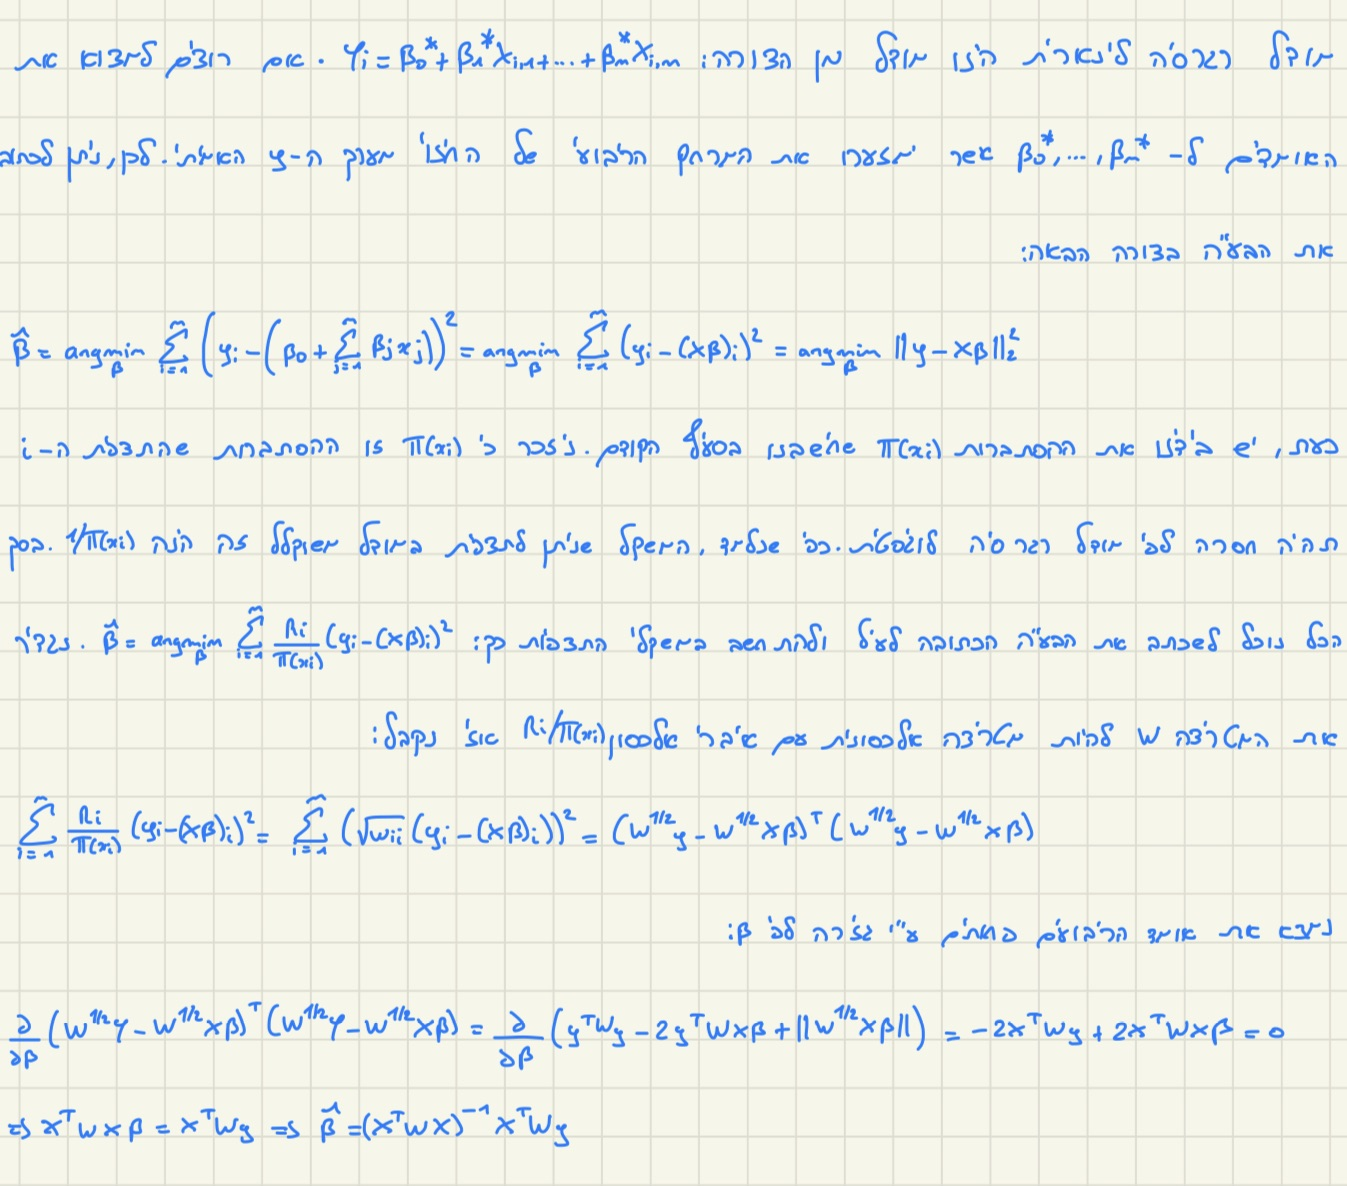

In [69]:
def sigmoid_func(x):
  return np.exp(x) / (1 + np.exp(x))

In [70]:
def weight_sample(beta_estimator, x):
  return 1 / sigmoid_func(np.matmul(x, beta_estimator))

In [71]:
W = np.diag([weight_sample(X_regression_imputation[i], beta_estimator_logistic) for i in range(X_regression_imputation.shape[0])])

xTwx_inv = np.linalg.inv(np.matmul(np.matmul(X_regression_imputation.T, W), X_regression_imputation))
xTwy = np.matmul(np.matmul(X_regression_imputation.T, W), y_regression_imputation)

beta_estimator_IPW = np.matmul(xTwx_inv, xTwy)
betas_dict["IPW"] = beta_estimator_IPW

print("The model is:")
print(f"({beta_estimator_IPW[0]}) + ({beta_estimator_IPW[1]}) * x1 + ({beta_estimator_IPW[2]}) * x2 + ({beta_estimator_IPW[3]}) * x3")
print()

print("Where:")
for key in dict_regression:
  print(f"{key} is the column {dict_regression[key]}")

The model is:
(-170.40097666015936) + (1.0209568928219426) * x1 + (2.7965296198015253) * x2 + (-0.647210978575913) * x3

Where:
y is the column Weight_(kg)
x1 is the column Height_(cm)
x2 is the column BMI
x3 is the column Is_Male


g) Now, we will calculate the confidence intervals of the coefficients based on the bootstrap method:

In [72]:
B = 1000
n = diseases_without_missing.shape[0]
beta_matrix_bootstrap = np.zeros((B, 4))
CIs = []

for b in range(B):
  df_temp_bootstrap = diseases_without_missing.sample(n, replace=True).reset_index(drop=True).copy()
  X_temp_bootstrap = np.c_[np.ones(df_temp_bootstrap.shape[0]), df_temp_bootstrap[["Height_(cm)", "BMI", "Is_Male"]].to_numpy()]
  y_temp_bootstrap = df_temp_bootstrap["Weight_(kg)"].to_numpy()

  W_bootstrap = np.diag([weight_sample(X_temp_bootstrap[i], beta_estimator_logistic) for i in range(X_temp_bootstrap.shape[0])])
  xTwx_inv = np.linalg.inv(np.matmul(np.matmul(X_temp_bootstrap.T, W_bootstrap), X_temp_bootstrap))
  xTwy = np.matmul(np.matmul(X_temp_bootstrap.T, W_bootstrap), y_temp_bootstrap)

  beta_estimator_IPW = np.matmul(xTwx_inv, xTwy)
  beta_matrix_bootstrap[b] = beta_estimator_IPW

for j in range(beta_matrix_bootstrap.shape[1]):
  CI_beta = [np.quantile([beta[j] for beta in beta_matrix_bootstrap], 0.025), np.quantile([beta[j] for beta in beta_matrix_bootstrap], 0.975)]
  CIs.append(CI_beta)
  print(f"The confidence interval for beta_{j} is: {CI_beta}")

CIs_dict["IPW"] = CIs

The confidence interval for beta_0 is: [-187.04690624538816, -164.86061676212776]
The confidence interval for beta_1 is: [0.9775044974616776, 1.1221671199916259]
The confidence interval for beta_2 is: [2.721408377029119, 2.9292052769265906]
The confidence interval for beta_3 is: [-1.678791742265662, 0.1832709789563636]


h) i) Now, we will compare all the coefficients of the regression of the different methods:

In [73]:
betas_df = pd.DataFrame.from_dict(betas_dict, orient='index', columns=['beta 0', 'Height', 'BMI', 'Is_Male'])
betas_df

,beta 0,Height,BMI,Is_Male
Full data,-172.143645,1.024936,2.830817,-0.332759
No missing data,-165.964756,0.995420,2.792148,-0.564659
Regression imputation,-165.964756,0.995420,2.792148,-0.564659
Multiple imputations,-176.401796,1.052786,2.807223,-0.875208
IPW,-170.400977,1.020957,2.796530,-0.647211


We can see that the values of the intercept of the different methods are more different than the others values of the explainers parameters of the different methods. Furthermore, we can see that the values oh the betas of the dataframe without missing data (after that we created missing data) and the betas of the regression imputation are the same. We saw previously that the values that we found with the regression imputation method are situated on the regression line and so do not increase the variance.

In [74]:
CIs_df = pd.DataFrame.from_dict(CIs_dict, orient='index', columns=['beta 0', 'Height', 'BMI', 'Is_Male'])
CIs_df

,beta 0,Height,BMI,Is_Male
Full data,"[-175.7534628562493, -168.53382693253712]","[1.003549825509638, 1.046321207164751]","[2.8073660899599484, 2.8542677971720214]","[-0.7987206888749301, 0.1332026750198952]"
No missing data,"[-169.20188217056776, -162.7276305712331]","[0.976359930821953, 1.0144791951769359]","[2.7690908568905472, 2.8152056856625007]","[-0.9680290883194351, -0.16128914515082277]"
Regression imputation,"[-168.24075986166022, -163.6887528801843]","[0.9819358063420793, 1.00890331965698]","[2.7773624218979935, 2.806934120655168]","[-0.8584496695752, -0.27086856389687686]"
Multiple imputations,"[-816.8486053179126, 464.0450128635871]","[-2.7450236003402795, 4.850595937269178]","[-1.5118197588997937, 7.126265808503973]","[-83.18353870605202, 81.43312346068473]"
IPW,"[-187.04690624538816, -164.86061676212776]","[0.9775044974616776, 1.1221671199916259]","[2.721408377029119, 2.9292052769265906]","[-1.678791742265662, 0.1832709789563636]"


In [75]:
CIs_df = pd.DataFrame.from_dict({key: [value[j][1] - value[j][0] for j in range(4)] for key, value in CIs_dict.items()},
                                orient='index', columns=['beta 0', 'Height', 'BMI', 'Is_Male'])
CIs_df

,beta 0,Height,BMI,Is_Male
Full data,7.219636,0.042771,0.046902,0.931923
No missing data,6.474252,0.038119,0.046115,0.806740
Regression imputation,4.552007,0.026968,0.029572,0.587581
Multiple imputations,1280.893618,7.595620,8.638086,164.616662
IPW,22.186289,0.144663,0.207797,1.862063


We can see that the length of the confidence intervals of the multiple imputations method is significantly bigger than the lengths of the confidence interval of the others methods. It makes sense that we sample with the normal distribution with the sample_variances and it increases the variances.

Now, we will plot on the graphs all the confidence intervals and the estimator of beta for all the method excepted for the multiple imputations method in order to make relevant plots.

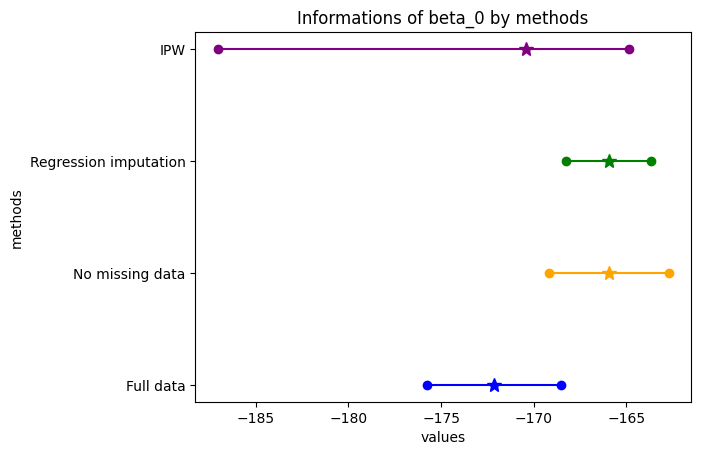

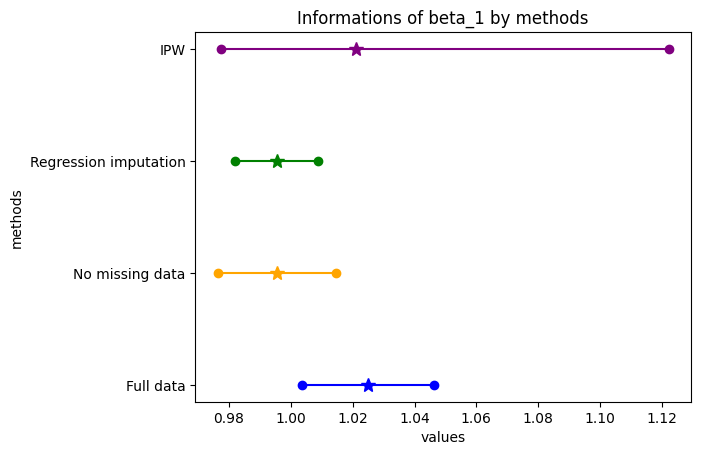

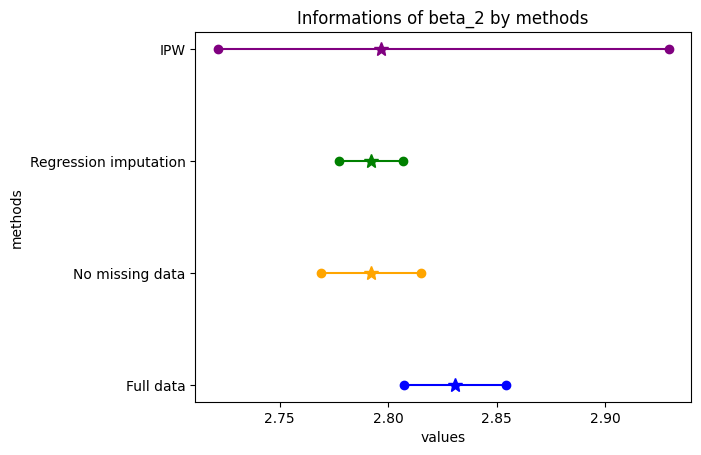

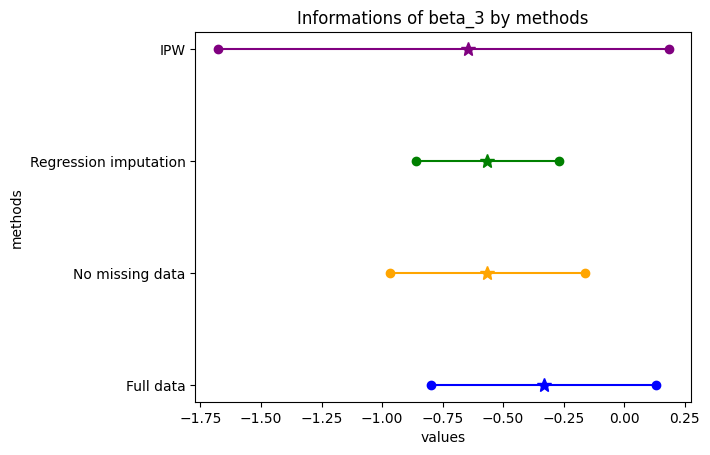

In [76]:
for j in range(4):
  for key, y, color in zip([key for key in betas_dict.keys() if key != 'Multiple imputations'], [k for k in range(4)], ["blue", "orange", "green", "purple"]):
    plt.plot(betas_dict[key][j], y, color=color, marker='*', markersize=10)
    plt.plot((CIs_dict[key][j][0], CIs_dict[key][j][1]), (y,y), color = color, marker = "o")

  plt.yticks([k for k in range(len(betas_dict) - 1)], [key for key in betas_dict.keys() if key != 'Multiple imputations'])
  plt.xlabel("values")
  plt.ylabel("methods")
  plt.title(f"Informations of beta_{j} by methods")
  plt.show()

We can see that, the IPW method gives us the largest confidence interval after the confidence interval of the method multiple imputations.

We can also see that all the confidence intervals of the regression imputation method are included in the confidence intervals of the no missing data. It makes sense because the the missing data that we estimate are situated on the regression line and so it does not increase the variance, and so the confidence interval is smaller.